In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train  = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.head()

,Id,Text,Sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [4]:
train[train['Sentiment']== 'negative'].head(10)

,Id,Text,Sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
7,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative
8,04dd1d2e34,i want to go to music tonight but i lost my vo...,negative
9,8a939bfb59,"Uh oh, I am sunburned",negative
10,3440297f8b,"S`ok, trying to plot alternatives as we speak...",negative
11,919fa93391,i`ve been sick for the past few days and thus...,negative
12,af3fed7fc3,is back home now gonna miss every one,negative


In [5]:
train[train['Sentiment']== 'positive'].head(10)

,Id,Text,Sentiment
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive
5,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive
6,16fab9f95b,I really really like the song Love Story by Ta...,positive
13,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive
14,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive
17,6ce4a4954b,juss came backk from Berkeleyy ; omg its madd ...,positive
19,d33f811375,I`m going home now. Have you seen my new twitt...,positive
20,7d8c4c11e4,i hope unni will make the audition . fighting ...,positive
22,2dc51711bc,That`s very funny. Cute kids.,positive
25,2863f435bd,A little happy for the wine jeje ok it`sm my f...,positive


In [6]:
train.shape

(16363, 3)

In [7]:
test.shape

(1000, 2)

In [8]:
train['Sentiment'].value_counts()

positive    8582
negative    7781
Name: Sentiment, dtype: int64

In [9]:
combi = train.append(test,ignore_index = True)

In [10]:
combi.shape

(17363, 3)

In [11]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [12]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['Text'], "@[\w]*")

In [13]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [14]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [15]:
combi.head()

,Id,Text,Sentiment,tidy_tweet
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo will miss here Diego
1,088c60f138,my boss is bullying me...,negative,boss bullying
2,9642c003ef,what interview! leave me alone,negative,what interview leave alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,Sons couldn they them releases already bought
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,feedings baby when smiles coos


In [16]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                      [Sooo, will, miss, here, Diego]
1                                     [boss, bullying]
2                      [what, interview, leave, alone]
3    [Sons, couldn, they, them, releases, already, ...
4                 [feedings, baby, when, smiles, coos]
Name: tidy_tweet, dtype: object

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                      [sooo, will, miss, here, diego]
1                                        [boss, bulli]
2                        [what, interview, leav, alon]
3    [son, couldn, they, them, releas, alreadi, bou...
4                       [feed, babi, when, smile, coo]
Name: tidy_tweet, dtype: object

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

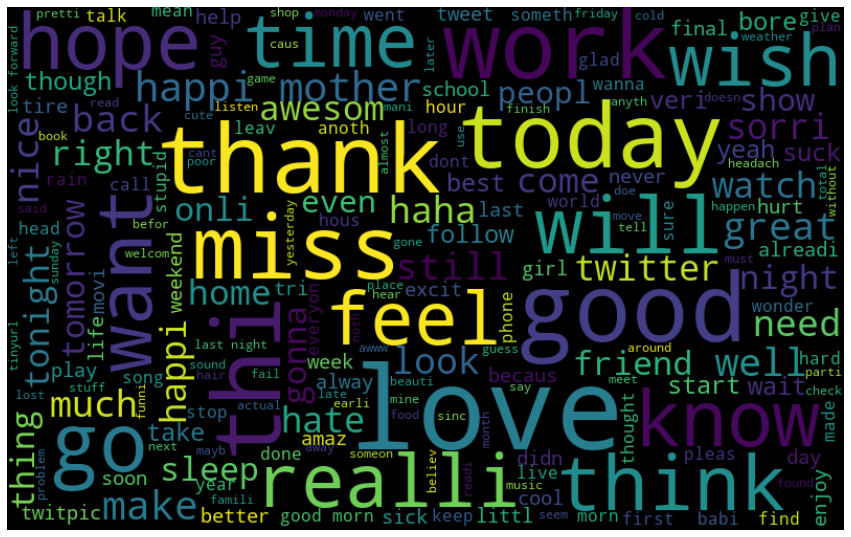

In [19]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

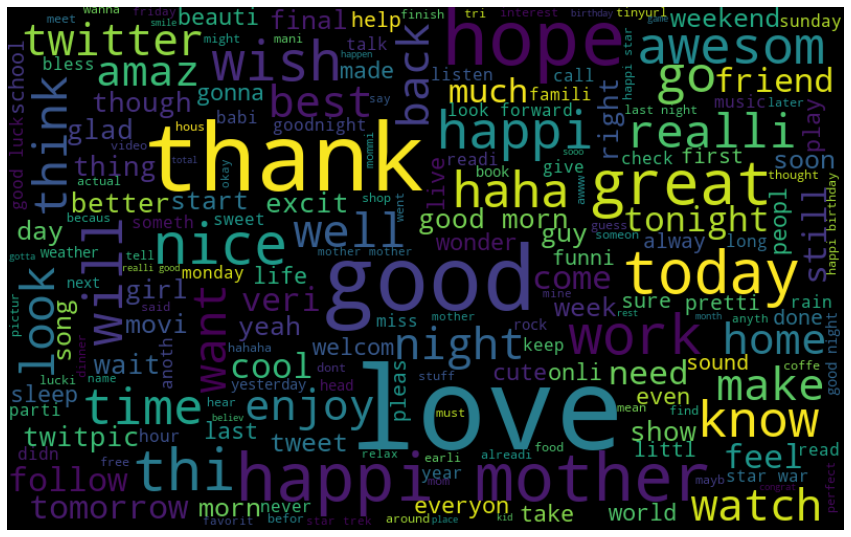

In [20]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['Sentiment'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

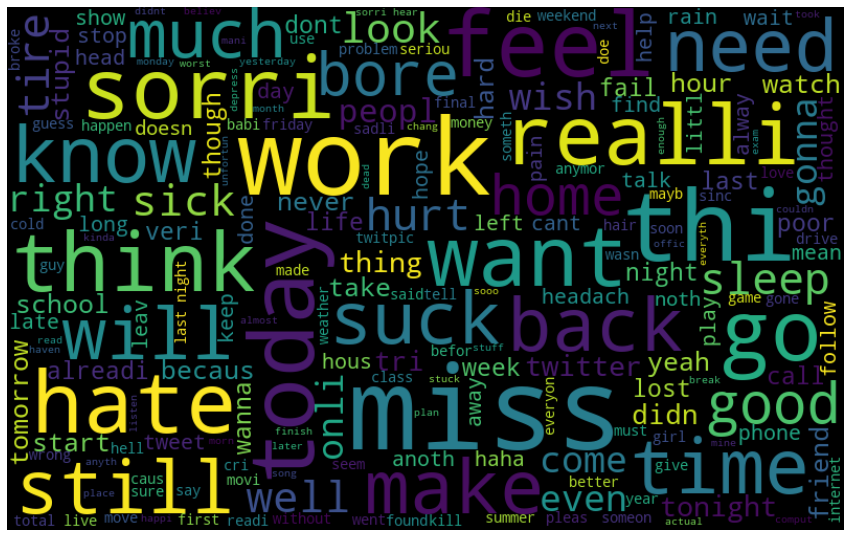

In [21]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['Sentiment'] == 'negative']])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from negativet/positive tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['Sentiment'] == 'positive'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['Sentiment'] == 'negative'])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

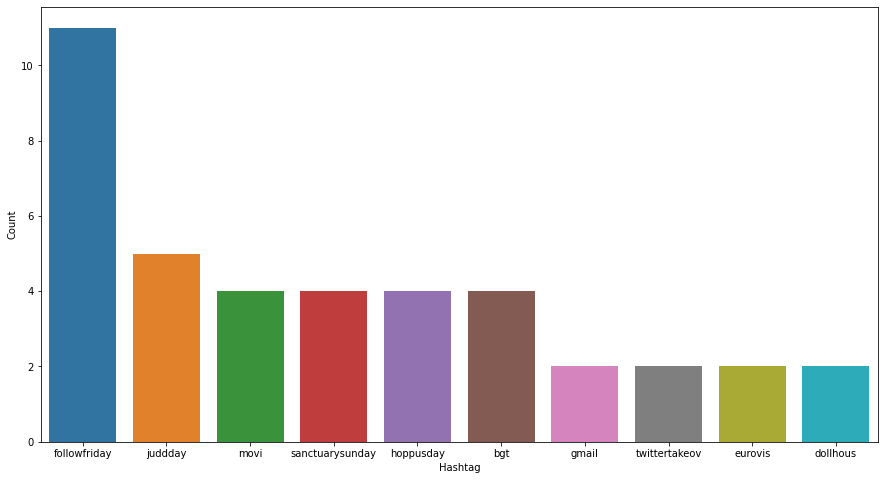

In [24]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,8))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

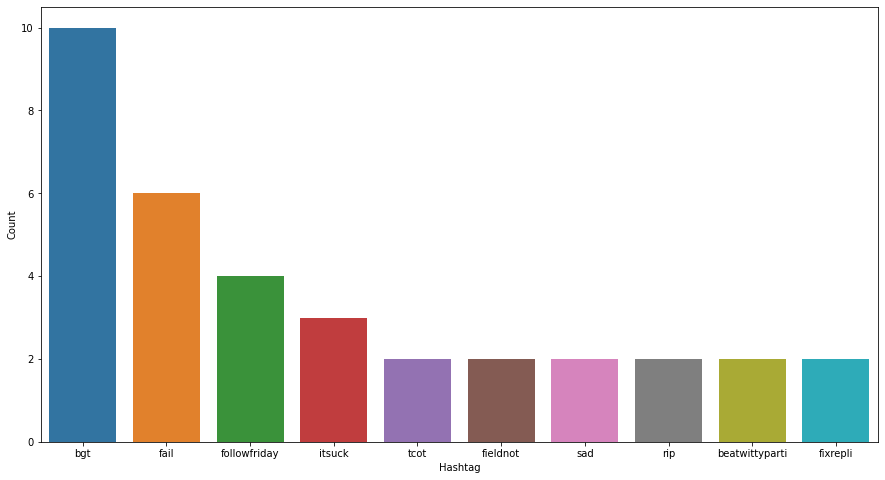

In [25]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(15,8))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [27]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(17363, 1000)

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(17363, 1000)

In [29]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(1980049, 2461820)

In [30]:
model_w2v.wv.most_similar(positive="great")

[('reel', 0.547776997089386),
 ('educ', 0.5445232391357422),
 ('ummmm', 0.5433756709098816),
 ('zombi', 0.540448784828186),
 ('meat', 0.5403982996940613),
 ('how', 0.5402181148529053),
 ('tassi', 0.5385216474533081),
 ('flesh', 0.5364544987678528),
 ('german', 0.535942554473877),
 ('niqht', 0.5353065133094788)]

In [31]:
model_w2v.wv.most_similar(positive="sick")

[('breath', 0.5843057036399841),
 ('booooooo', 0.5811535120010376),
 ('hurtin', 0.5760628581047058),
 ('fever', 0.5745126008987427),
 ('poorli', 0.5718699097633362),
 ('stupidli', 0.5717350244522095),
 ('homesick', 0.5686264038085938),
 ('nauseou', 0.5662918090820312),
 ('prolli', 0.5616627335548401),
 ('union', 0.5595082640647888)]

In [32]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [33]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape    

(17363, 200)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
train_bow = bow[:16363,:]
test_bow = bow[16363: , :]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Sentiment'], random_state=100, test_size=0.3)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

lreg_model = LogisticRegression()
lreg_model.fit(xtrain_bow, ytrain)

y_pred = lreg_model.predict(xvalid_bow)

print("Training Accuracy :", lreg_model.score(xtrain_bow, ytrain))
print("Validation Accuracy :", lreg_model.score(xvalid_bow, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.8751527850532566
Validation Accuracy : 0.836626604196374
[[2042  356]
 [ 446 2065]]


In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain_bow, ytrain)

y_pred = dt_model.predict(xvalid_bow)

print("Training Accuracy :", dt_model.score(xtrain_bow, ytrain))
print("Validation Accuracy :", dt_model.score(xvalid_bow, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.9804435131831675
Validation Accuracy : 0.7930332043185985
[[1854  544]
 [ 472 2039]]


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(xtrain_bow, ytrain)

y_pred = rf_model.predict(xvalid_bow)

print("Training Accuracy :", rf_model.score(xtrain_bow, ytrain))
print("Validation Accuracy :", rf_model.score(xvalid_bow, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.9804435131831675
Validation Accuracy : 0.8219596659197392
[[1906  492]
 [ 382 2129]]


In [39]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(xtrain_bow, ytrain)

y_pred = svc_model.predict(xvalid_bow)

print("Training Accuracy :", svc_model.score(xtrain_bow, ytrain))
print("Validation Accuracy :", svc_model.score(xvalid_bow, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.9305919329491881
Validation Accuracy : 0.8358117742921165
[[2087  311]
 [ 495 2016]]


In [40]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(xtrain_bow, ytrain)

y_pred = xgb_model.predict(xvalid_bow)

print("Training Accuracy :", xgb_model.score(xtrain_bow, ytrain))
print("Validation Accuracy :", xgb_model.score(xvalid_bow, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.7984110354461323
Validation Accuracy : 0.7907924220818904
[[2190  208]
 [ 819 1692]]


In [41]:
train_tfidf = tfidf[:16363,:]
test_tfidf = tfidf[16363:,:]

In [42]:
# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['Sentiment'], random_state=100, test_size=0.3)

In [43]:
#xtrain_tfidf = train_tfidf[ytrain.index]
#xvalid_tfidf = train_tfidf[yvalid.index]

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

lreg_tf = LogisticRegression()
lreg_tf.fit(xtrain_tfidf, ytrain)

y_pred = lreg_tf.predict(xvalid_tfidf)

print("Training Accuracy :", lreg_tf.score(xtrain_tfidf, ytrain))
print("Validation Accuracy :", lreg_tf.score(xvalid_tfidf, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.8740178103719225
Validation Accuracy : 0.8390710939091465
[[2043  355]
 [ 435 2076]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_tf = DecisionTreeClassifier()
dt_tf.fit(xtrain_tfidf, ytrain)

y_pred = dt_tf.predict(xvalid_tfidf)

print("Training Accuracy :", dt_tf.score(xtrain_tfidf, ytrain))
print("Validation Accuracy :", dt_tf.score(xvalid_tfidf, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.9801815959490134
Validation Accuracy : 0.7883479323691179
[[1887  511]
 [ 528 1983]]


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_tf = RandomForestClassifier()
rf_tf.fit(xtrain_tfidf, ytrain)

y_pred = rf_tf.predict(xvalid_tfidf)

print("Training Accuracy :", rf_tf.score(xtrain_tfidf, ytrain))
print("Validation Accuracy :", rf_tf.score(xvalid_tfidf, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.9801815959490134
Validation Accuracy : 0.8266449378692198
[[1997  401]
 [ 450 2061]]


In [47]:
from sklearn.svm import SVC

svc_tf = SVC()
svc_tf.fit(xtrain_tfidf, ytrain)

y_pred = svc_tf.predict(xvalid_tfidf)

print("Training Accuracy :", svc_tf.score(xtrain_tfidf, ytrain))
print("Validation Accuracy :", svc_tf.score(xvalid_tfidf, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.9464815784878645
Validation Accuracy : 0.8402933387655327
[[2064  334]
 [ 450 2061]]


In [48]:
from xgboost import XGBClassifier

xgb_tf = XGBClassifier()
xgb_tf.fit(xtrain_tfidf, ytrain)

y_pred = xgb_tf.predict(xvalid_tfidf)

print("Training Accuracy :", xgb_tf.score(xtrain_tfidf, ytrain))
print("Validation Accuracy :", xgb_tf.score(xvalid_tfidf, yvalid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(yvalid, y_pred))

# confusion matrix
cm = confusion_matrix(yvalid, y_pred)
print(cm)

Training Accuracy : 0.8009429020429544
Validation Accuracy : 0.7907924220818904
[[2186  212]
 [ 815 1696]]


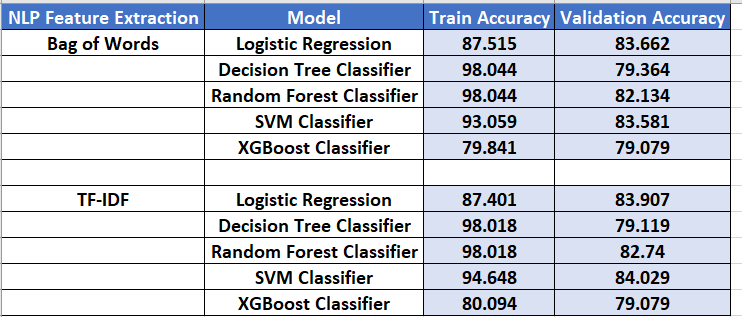

In [49]:
predictions = svc_tf.predict(test_tfidf)

In [50]:
print(predictions)

['positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'negative' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'positive'
 'negative' 'positive' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'posit

In [51]:
test['Sentiment'] = predictions

In [52]:
test.to_csv('/content/test-predictions.csv', index = False)

In [53]:
df1 = pd.read_csv('/content/test-predictions.csv')
df1

,Id,Text,Sentiment
0,96d74cb729,Shanghai is also really exciting (precisely -...,positive
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
2,01082688c6,happy bday!,positive
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
4,726e501993,that`s great!! weee!! visitors!,positive
...,...,...,...
995,9b210c4a6f,Haha...YAY!!! I`M CURED!!!!,positive
996,68c674acdb,"Sick, sick, sick. This sucks. i can`t even bre...",negative
997,6cadda7b98,Adding names to my Twitter account and learnin...,positive
998,79a28b1ac7,ooh thats an early start ive got bed planned...,negative
